In [ ]:
!pip install pandas plotly openpyxl -q

In [ ]:
!pip install jupyter-dash==0.4.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.2 MB/s eta 0:00:00


In [ ]:
!pip install dash==2.10.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Задания к Potly

1. Диаграмма рассеяния с настройкой hover-информации и цветовой схемы
Постройте scatter plot с цветовым кодированием по категориям товаров и настройте всплывающую информацию (hover).
2. Box-Plot с выделением выбросов и динамическим изменением по сегменту клиентов
Постройте box-plot для анализа распределения продаж по категориям товаров с возможностью выбора сегмента клиентов.
3. Круговая диаграмма с разбиением по регионам и категориям товаров
Постройте интерактивную pie chart, позволяющую анализировать долю продаж в разных регионах с разбиением по категориям товаров.

4. Тепловая карта продаж по месяцам и регионам.

1. Диаграмма рассеяния с настройкой hover-информации и цветовой схемы
Постройте scatter plot с цветовым кодированием по категориям товаров и настройте всплывающую информацию (hover).

In [ ]:
import plotly.express as px

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

fig1 = px.scatter(df,
                 x='Order Date',
                 y='Sales',
                 color='Category',
                 hover_data=['Product Name', 'Sub-Category', 'Region'],
                 title='Продажи по категориям товаров',
                 labels={'Order Date': 'Дата заказа', 'Sales': 'Объем продаж ($)'},
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig1.update_traces(marker=dict(size=8, opacity=0.7))
fig1.update_layout(hovermode='closest')
fig1.show()

2. Box-Plot с выделением выбросов и динамическим изменением по сегменту клиентов
Постройте box-plot для анализа распределения продаж по категориям товаров с возможностью выбора сегмента клиентов.

In [ ]:
fig2 = px.box(df,
             x='Category',
             y='Sales',
             color='Segment',
             title='Распределение продаж по категориям и сегментам клиентов',
             labels={'Sales': 'Продажи ($)', 'Category': 'Категория товара'},
             color_discrete_sequence=px.colors.qualitative.Set2)

fig2.update_traces(boxpoints='outliers')
fig2.update_layout(boxmode='group')

fig2.show()

3. Круговая диаграмма с разбиением по регионам и категориям товаров
Постройте интерактивную pie chart, позволяющую анализировать долю продаж в разных регионах с разбиением по категориям товаров.


In [ ]:
region_category = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

fig3 = px.sunburst(region_category,
                  path=['Region', 'Category'],
                  values='Sales',
                  title='Доля продаж по регионам и категориям',
                  color='Region',
                  color_discrete_sequence=px.colors.qualitative.Prism)

fig3.update_traces(textinfo='label+percent parent')
fig3.show()


4. Тепловая карта продаж по месяцам и регионам.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Month'] = df['Order Date'].dt.month_name()

# агрегируем данные
heatmap_data = df.groupby(['Region', 'Month'])['Sales'].sum().reset_index()

# создаем правильный порядок месяцев
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data['Month'] = pd.Categorical(heatmap_data['Month'], categories=month_order, ordered=True)
heatmap_data = heatmap_data.sort_values('Month')

fig4 = px.density_heatmap(heatmap_data,
                         x='Month',
                         y='Region',
                         z='Sales',
                         title='Тепловая карта продаж по месяцам и регионам',
                         color_continuous_scale='Viridis',
                         labels={'Sales': 'Сумма продаж ($)'})

fig4.show()

# Задания к Dash

1. Дашборд "Анализ продаж по категориям и сегментам". Цель: Отобразить гистограмму продаж (Sales) по категориям товаров (Category), позволяя пользователю фильтровать данные по одному или нескольким сегментам (Segment).

2. Дашборд "Динамика ПРОДАЖ во времени с фильтром по штатам". Цель: Показать линейный график суммарных продаж (Sales) по месяцам (так как Profit отсутствует). Добавить фильтр, позволяющий выбрать один или несколько штатов (State) для анализа. Изменения: Используем Sales вместо Profit.

3. Дашборд "Структура продаж по категориям (Treemap)". Цель: Создать Treemap диаграмму, показывающую иерархию продаж (Sales) по категориям (Category) и подкатегориям (Sub-Category). Изменения: Заменяем Scatter plot (требовавший Profit и Quantity) на Treemap, который использует доступные Sales, Category, Sub-Category.

In [ ]:
import dash
from dash import dcc, html, Input, Output

# создание приложения Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Анализ продаж", style={'textAlign': 'center'}),

    # Дашборд 1: Анализ продаж по категориям и сегментам
    html.Div([
        html.H2("Анализ продаж по категориям и сегментам"),
        dcc.Dropdown(
            id='segment-filter',
            options=[{'label': seg, 'value': seg} for seg in df['Segment'].unique()],
            value=df['Segment'].unique().tolist(),
            multi=True,
            placeholder="Выберите сегмент(ы) клиентов"
        ),
        dcc.Graph(id='category-sales-hist')
    ], style={'padding': '20px', 'border': '1px solid #ddd', 'margin': '10px', 'borderRadius': '5px'}),

    # Дашборд 2: Динамика продаж во времени
    html.Div([
        html.H2("Динамика продаж по месяцам"),
        dcc.Dropdown(
            id='state-filter',
            options=[{'label': state, 'value': state} for state in df['State'].unique()],
            value=['California', 'New York'],  # пример значений по умолчанию
            multi=True,
            placeholder="Выберите штат(ы)"
        ),
        dcc.Graph(id='sales-trend-line')
    ], style={'padding': '20px', 'border': '1px solid #ddd', 'margin': '10px', 'borderRadius': '5px'}),

    # Дашборд 3: Структура продаж по категориям
    html.Div([
        html.H2("Структура продаж по категориям и подкатегориям"),
        dcc.Graph(
            id='sales-treemap',
            figure=px.treemap(df, path=['Category', 'Sub-Category'], values='Sales',
                              title='Иерархия продаж по категориям и подкатегориям',
                              color_discrete_sequence=px.colors.qualitative.Pastel)
        )
    ], style={'padding': '20px', 'border': '1px solid #ddd', 'margin': '10px', 'borderRadius': '5px'})
])

# Колбек для дашборда 1
@app.callback(
    Output('category-sales-hist', 'figure'),
    Input('segment-filter', 'value')
)
def update_histogram(selected_segments):
    filtered_df = df[df['Segment'].isin(selected_segments)]
    fig = px.histogram(filtered_df, x='Category', y='Sales', color='Segment',
                       title='Продажи по категориям товаров',
                       labels={'Sales': 'Сумма продаж ($)', 'Category': 'Категория товара'},
                       barmode='group',
                       histfunc='sum')
    fig.update_layout(hovermode='closest')
    return fig

# Колбек для дашборда 2
@app.callback(
    Output('sales-trend-line', 'figure'),
    Input('state-filter', 'value')
)
def update_line_chart(selected_states):
    filtered_df = df[df['State'].isin(selected_states)]
    monthly_sales = filtered_df.groupby(['State', 'Month'])['Sales'].sum().reset_index()

    fig = px.line(monthly_sales, x='Month', y='Sales', color='State',
                  title='Динамика продаж по месяцам',
                  labels={'Sales': 'Сумма продаж ($)', 'Month': 'Месяц'})
    fig.update_xaxes(categoryorder='array', categoryarray=month_order)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on


так как Dash запускает отдельный сервер для результатов дашбордов, который не всегда открывается, я решил использовать JupyterDash:

In [ ]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Анализ продаж", style={'textAlign': 'center'}),

    # Дашборд 1: Анализ продаж по категориям и сегментам
    html.Div([
        html.H2("1. Анализ продаж по категориям и сегментам"),
        dcc.Dropdown(
            id='segment-filter',
            options=[{'label': seg, 'value': seg} for seg in df['Segment'].unique()],
            value=df['Segment'].unique().tolist(),
            multi=True,
            placeholder="Выберите сегмент(ы) клиентов"
        ),
        dcc.Graph(id='category-sales-hist')
    ], style={'padding': '20px', 'border': '1px solid #ddd', 'margin': '10px', 'borderRadius': '5px'}),

    # Дашборд 2: Динамика продаж во времени
    html.Div([
        html.H2("2. Динамика продаж по месяцам"),
        dcc.Dropdown(
            id='state-filter',
            options=[{'label': state, 'value': state} for state in df['State'].unique()],
            value=['California', 'New York'],  # Пример значений по умолчанию
            multi=True,
            placeholder="Выберите штат(ы)"
        ),
        dcc.Graph(id='sales-trend-line')
    ], style={'padding': '20px', 'border': '1px solid #ddd', 'margin': '10px', 'borderRadius': '5px'}),

    # Дашборд 3: Структура продаж по категориям
    html.Div([
        html.H2("3. Структура продаж по категориям"),
        dcc.Graph(
            id='sales-treemap',
            figure=px.treemap(df, path=['Category', 'Sub-Category'], values='Sales',
                            title='Иерархия продаж по категориям и подкатегориям',
                            color_discrete_sequence=px.colors.qualitative.Pastel)
        )
    ], style={'padding': '20px', 'border': '1px solid #ddd', 'margin': '10px', 'borderRadius': '5px'})
])

# Колбек для дашборда 1
@app.callback(
    Output('category-sales-hist', 'figure'),
    Input('segment-filter', 'value')
)
def update_histogram(selected_segments):
    filtered_df = df[df['Segment'].isin(selected_segments)]
    fig = px.histogram(filtered_df, x='Category', y='Sales', color='Segment',
                     title='Продажи по категориям товаров',
                     labels={'Sales': 'Сумма продаж ($)', 'Category': 'Категория товара'},
                     barmode='group',
                     histfunc='sum')
    fig.update_layout(hovermode='closest')
    return fig

# Колбек для дашборда 2
@app.callback(
    Output('sales-trend-line', 'figure'),
    Input('state-filter', 'value')
)
def update_line_chart(selected_states):
    filtered_df = df[df['State'].isin(selected_states)]
    monthly_sales = filtered_df.groupby(['State', 'Month'])['Sales'].sum().reset_index()

    fig = px.line(monthly_sales, x='Month', y='Sales', color='State',
                title='Динамика продаж по месяцам',
                labels={'Sales': 'Сумма продаж ($)', 'Month': 'Месяц'})
    fig.update_xaxes(categoryorder='array', categoryarray=month_order)
    return fig

app.run_server(mode='inline', height=1200)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

# Задания к GeoPandas


1. Построить интерактивную карту с помощью Plotly, отображающую плотность населения по регионам из файла(найти на kaggle или gadm.org).

2. Добавить на карту точки с координатами 5 городов и отобразить их названия и условные значения (например, COVID-19 по городам или количество камер наблюдения) при наведении.

In [ ]:
import geopandas as gpd
import json
import requests

url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/germany.geojson"  # германия
gdf = gpd.read_file(url)

# создаем случайные данные о плотности населения для примера
import numpy as np
np.random.seed(42)
gdf['population_density'] = np.random.randint(50, 2000, size=len(gdf))

# Создаем DataFrame с городами и их характеристиками
cities_data = {
    'city': ['Berlin', 'Munich', 'Hamburg', 'Cologne', 'Frankfurt'],
    'lat': [52.52, 48.1351, 53.5511, 50.9375, 50.1109],
    'lon': [13.405, 11.5820, 9.9937, 6.9603, 8.6821],
    'covid_cases': [120000, 85000, 95000, 75000, 70000],  # пример данных
    'cameras_count': [1500, 1200, 1100, 900, 800]         # пример данных
}
cities_df = pd.DataFrame(cities_data)
cities_df = gpd.GeoDataFrame(cities_df, geometry=gpd.points_from_xy(cities_df.lon, cities_df.lat))
cities_df

,city,lat,lon,covid_cases,cameras_count,geometry
0,Berlin,52.5200,13.4050,120000,1500,POINT (13.405 52.52)
1,Munich,48.1351,11.5820,85000,1200,POINT (11.582 48.1351)
2,Hamburg,53.5511,9.9937,95000,1100,POINT (9.9937 53.5511)
3,Cologne,50.9375,6.9603,75000,900,POINT (6.9603 50.9375)
4,Frankfurt,50.1109,8.6821,70000,800,POINT (8.6821 50.1109)


In [ ]:
# cоздаем интерактивную карту
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color='population_density',
    color_continuous_scale="Viridis",
    range_color=(gdf['population_density'].min(), gdf['population_density'].max()),
    mapbox_style="carto-positron",
    zoom=5,
    center={"lat": 51.1657, "lon": 10.4515},  # Центр для Германии
    opacity=0.5,
    labels={'population_density': 'Плотность населения (чел/км²)'},
    title='Плотность населения по регионам и статистика по городам'
)

# добавляем города на карту
fig.add_trace(px.scatter_mapbox(
    cities_df,
    lat='lat',
    lon='lon',
    hover_name='city',
    hover_data={'covid_cases': True, 'cameras_count': True, 'lat': False, 'lon': False},
    size=[10]*len(cities_df),  # Размер точек
    text='city'
).data[0])

# настраиваем отображение
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":40,"l":0,"b":0},
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

fig.show()

# Задания к NetworkX

1. Создание и визуализация графа. Создайте неориентированный граф с помощью библиотеки NetworkX. Добавьте в граф 6 узлов (например, A, B, C, D, E, F) и 8 рёбер (связи между узлами). Визуализируйте граф с помощью Matplotlib, используя стандартные настройки.Подсказка: Используйте функции nx.Graph(), add_node(), add_edge(), и nx.draw() для создания и визуализации графа.

2. Добавление атрибутов и кастомизация визуализации1. На основе графа из первого задания добавьте атрибуты к узлам (например, "вес" или "тип") и рёбрам (например, "длина" или "сила связи"). Визуализируйте граф, изменив цвет и размер узлов в зависимости от их атрибутов. Например, используйте разные цвета для узлов в зависимости от их типа, а размеры узлов — в зависимости от веса.Подсказка: Используйте методы add_node() и add_edge() для добавления атрибутов. Для визуализации используйте параметры node_color и node_size в nx.draw().


3. Поиск кратчайших путей. Используя граф из второго задания, добавьте веса к рёбрам (например, случайные значения от 1 до 10). Выберите два узла в графе и найдите кратчайший путь между ними с использованием алгоритма Дейкстры. Визуализируйте граф, выделив кратчайший путь другим цветом и увеличив размер узлов на этом пути.Подсказка: Используйте функцию nx.shortest_path() для нахождения кратчайшего пути и nx.get_edge_attributes() для получения весов рёбер. Для визуализации используйте параметры edge_color и node_size
 в nx.draw(). Это задание позволит вам изучить, как работать с весами рёбер и находить кратчайшие пути в графах с помощью NetworkX!

1. Создание и визуализация графа. Создайте неориентированный граф с помощью библиотеки NetworkX. Добавьте в граф 6 узлов (например, A, B, C, D, E, F) и 8 рёбер (связи между узлами). Визуализируйте граф с помощью Matplotlib, используя стандартные настройки.Подсказка: Используйте функции nx.Graph(), add_node(), add_edge(), и nx.draw() для создания и визуализации графа.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes = ["A", "B", "C", "D", "E", "F"]
G.add_nodes_from(nodes)

edges = [
    ("A", "B"), ("A", "C"), ("B", "C"), ("B", "D"),
    ("C", "E"), ("D", "E"), ("E", "F"), ("F", "A")
]
G.add_edges_from(edges)

print("Узлы графа:", list(G.nodes()))
print("Рёбра графа:", list(G.edges()))
print("Количество узлов:", G.number_of_nodes())
print("Количество рёбер:", G.number_of_edges())

Узлы графа: ['A', 'B', 'C', 'D', 'E', 'F']
Рёбра графа: [('A', 'B'), ('A', 'C'), ('A', 'F'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('E', 'F')]
Количество узлов: 6
Количество рёбер: 8


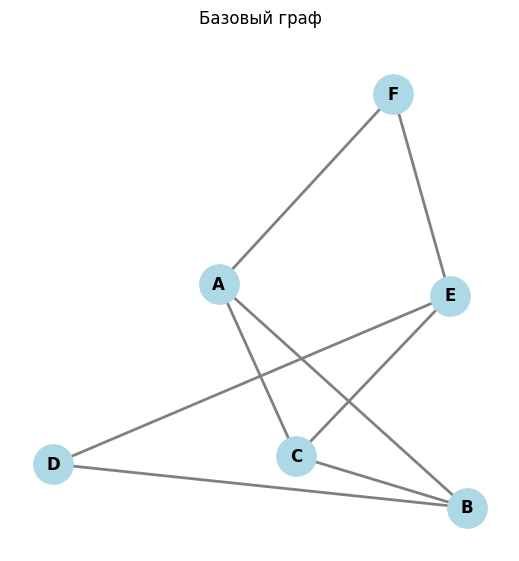

In [ ]:
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos,
        with_labels=True,
        node_color='lightblue',
        node_size=800,
        edge_color='gray',
        width=2,
        font_size=12,
        font_weight='bold')

plt.title("Базовый граф", pad=20)
plt.show()


2. Добавление атрибутов и кастомизация визуализации1. На основе графа из первого задания добавьте атрибуты к узлам (например, "вес" или "тип") и рёбрам (например, "длина" или "сила связи"). Визуализируйте граф, изменив цвет и размер узлов в зависимости от их атрибутов. Например, используйте разные цвета для узлов в зависимости от их типа, а размеры узлов — в зависимости от веса.Подсказка: Используйте методы add_node() и add_edge() для добавления атрибутов. Для визуализации используйте параметры node_color и node_size в nx.draw().



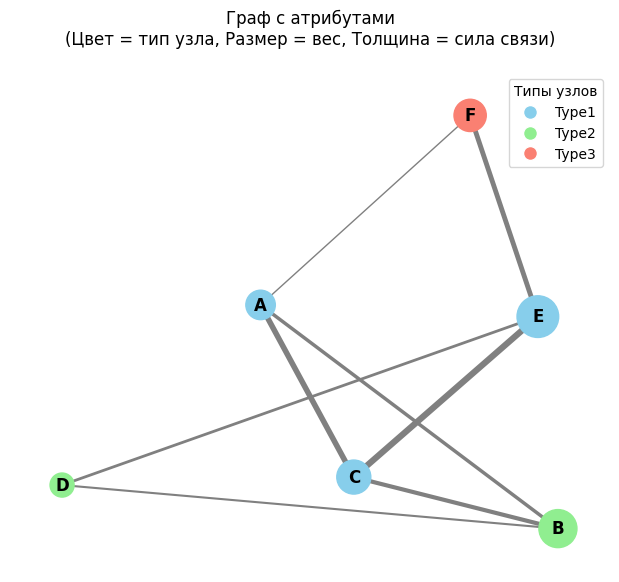

In [ ]:
node_types = {
    "A": "Type1", "B": "Type2", "C": "Type1",
    "D": "Type2", "E": "Type1", "F": "Type3"
}
node_weights = {
    "A": 15, "B": 25, "C": 20,
    "D": 10, "E": 30, "F": 18
}

for node in G.nodes():
    G.nodes[node]['type'] = node_types[node]
    G.nodes[node]['weight'] = node_weights[node]

edge_strengths = {
    ("A", "B"): 5, ("A", "C"): 8, ("B", "C"): 6,
    ("B", "D"): 3, ("C", "E"): 9, ("D", "E"): 4,
    ("E", "F"): 7, ("F", "A"): 2
}

for u, v in G.edges():
    if (u, v) in edge_strengths:
        G.edges[u, v]['strength'] = edge_strengths[(u, v)]
    elif (v, u) in edge_strengths:
        G.edges[u, v]['strength'] = edge_strengths[(v, u)]
    else:
        pass

node_colors = {
    "Type1": "skyblue",
    "Type2": "lightgreen",
    "Type3": "salmon"
}

plt.figure(figsize=(6, 5))

nx.draw(G, pos,
        with_labels=True,
        node_color= [node_colors[G.nodes[n]['type']] for n in G.nodes()],
        node_size=[G.nodes[n]['weight'] * 30 for n in G.nodes()],
        edge_color='gray',
        width=[G.edges[e]['strength'] * 0.5 for e in G.edges()],
        font_size=12,
        font_weight='bold')

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Type1', markerfacecolor='skyblue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Type2', markerfacecolor='lightgreen', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Type3', markerfacecolor='salmon', markersize=10)
]

plt.legend(handles=legend_elements, title="Типы узлов", loc='upper right')

plt.title("Граф с атрибутами\n(Цвет = тип узла, Размер = вес, Толщина = сила связи)", pad=20)
plt.show()


3. Поиск кратчайших путей. Используя граф из второго задания, добавьте веса к рёбрам (например, случайные значения от 1 до 10). Выберите два узла в графе и найдите кратчайший путь между ними с использованием алгоритма Дейкстры. Визуализируйте граф, выделив кратчайший путь другим цветом и увеличив размер узлов на этом пути.Подсказка: Используйте функцию nx.shortest_path() для нахождения кратчайшего пути и nx.get_edge_attributes() для получения весов рёбер. Для визуализации используйте параметры edge_color и node_size
 в nx.draw(). Это задание позволит вам изучить, как работать с весами рёбер и находить кратчайшие пути в графах с помощью NetworkX!

In [ ]:
import random

for u, v in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

start, end = "A", "E"

# находим кратчайший путь
try:
    path = nx.shortest_path(G, source=start, target=end, weight='weight')
    path_length = nx.shortest_path_length(G, source=start, target=end, weight='weight')
    path_edges = list(zip(path[:-1], path[1:]))

    print(f"Кратчайший путь от {start} до {end}: {path}")
    print(f"Длина пути: {path_length}")
    print(f"Рёбра пути: {path_edges}")

    node_colors = ['red' if node in path else 'lightblue' for node in G.nodes()]
    node_sizes = [1000 if node in path else 600 for node in G.nodes()]
    edge_colors = ['red' if edge in path_edges or (edge[1], edge[0]) in path_edges else 'gray' for edge in G.edges()]
    edge_widths = [3 if edge in path_edges or (edge[1], edge[0]) in path_edges else 1 for edge in G.edges()]

except nx.NetworkXNoPath:
    print(f"Путь между {start} и {end} не существует!")
    node_colors = ['lightblue'] * len(G.nodes())
    node_sizes = [600] * len(G.nodes())
    edge_colors = ['gray'] * len(G.edges())
    edge_widths = [1] * len(G.edges())

Кратчайший путь от A до E: ['A', 'C', 'E']
Длина пути: 8
Рёбра пути: [('A', 'C'), ('C', 'E')]


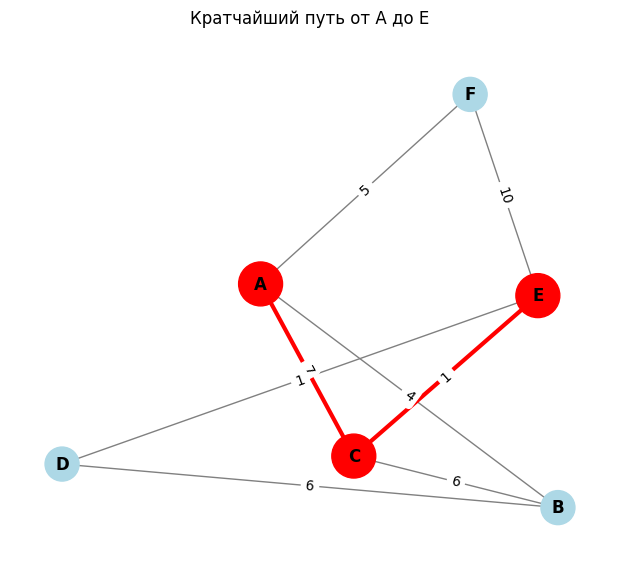

In [ ]:
plt.figure(figsize=(6, 5))

nx.draw(G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=node_sizes,
        edge_color=edge_colors,
        width=edge_widths,
        font_size=12,
        font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title(f"Кратчайший путь от {start} до {end}", pad=20)
plt.show()